Train dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   Na

/tmp/ipykernel_463578/3458855173.py:25: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


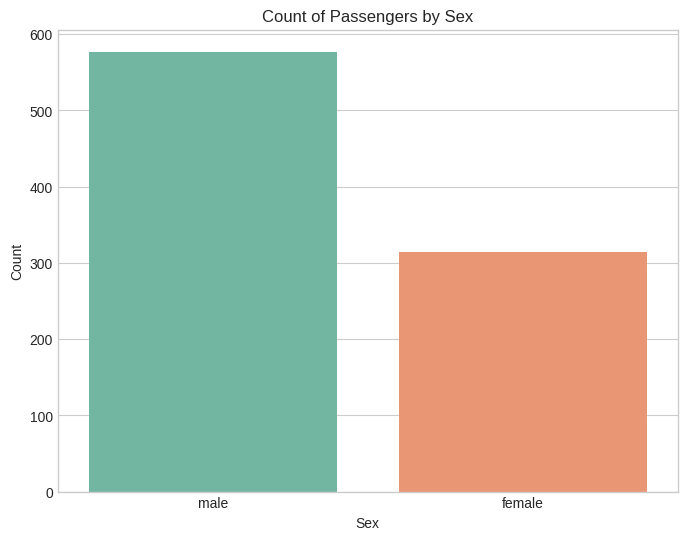

/home/serhii/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/serhii/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/serhii/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/serhii/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/serhii/.local/lib/python3.

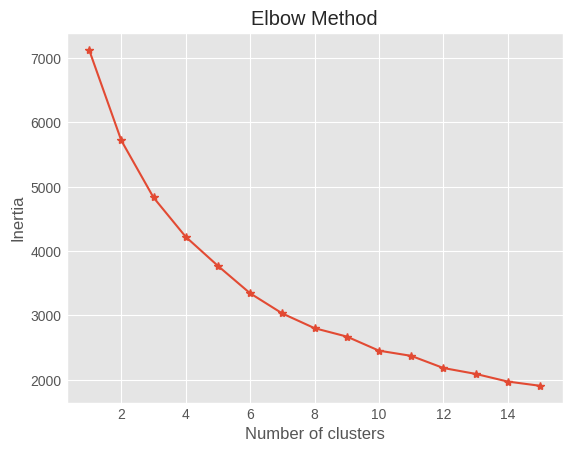

/home/serhii/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_463578/3458855173.py:84: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


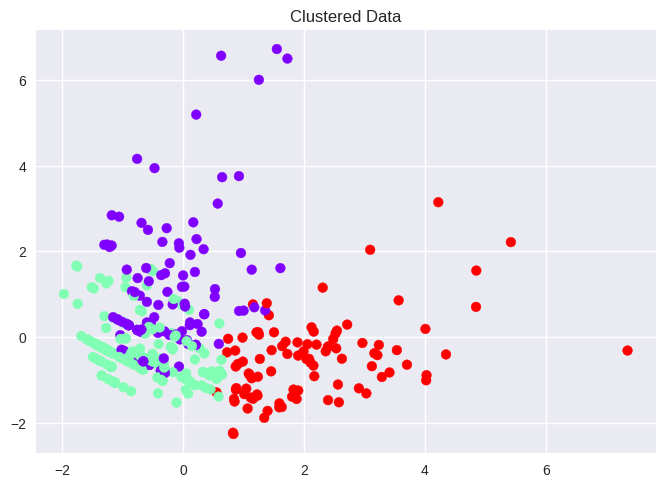

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

class TitanicDataAnalyzer:
    def __init__(self, train_file, test_file):
        self.train_file = train_file
        self.test_file = test_file

    def load_data(self):
        self.train_df = pd.read_csv(self.train_file)
        self.test_df = pd.read_csv(self.test_file)

    def explore_data(self):
        print("Train dataset:")
        print(self.train_df.head())
        print("\nTest dataset:")
        print(self.test_df.head())

    def visualize_data(self):
        # Visualize data using plots
        plt.style.use('seaborn-whitegrid')
        sns.set_palette("Set2")

        # Example plot: Count plot of 'Sex'
        plt.figure(figsize=(8, 6))
        sns.countplot(x='Sex', data=self.train_df)
        plt.title('Count of Passengers by Sex')
        plt.xlabel('Sex')
        plt.ylabel('Count')
        plt.show()

    def handle_missing_values(self):
        # Handle missing values
        self.train_df['Age'].fillna(self.train_df['Age'].median(), inplace=True)
        self.train_df['Embarked'].fillna(self.train_df['Embarked'].mode()[0], inplace=True)
        self.test_df['Age'].fillna(self.test_df['Age'].median(), inplace=True)
        self.test_df['Fare'].fillna(self.test_df['Fare'].median(), inplace=True)

    def drop_columns(self):
        # Drop unnecessary columns
        self.train_df.drop(['Cabin', 'Ticket', 'PassengerId', 'Name'], axis=1, inplace=True)
        self.test_df.drop(['Cabin', 'Ticket', 'PassengerId', 'Name'], axis=1, inplace=True)

    def convert_categorical_data(self):
        # Convert categorical data to numerical
        self.train_df.replace({'Sex': {'male': 0, 'female': 1}, 'Embarked': {'S': 0, 'C': 1, 'Q': 2}}, inplace=True)
        self.test_df.replace({'Sex': {'male': 0, 'female': 1}, 'Embarked': {'S': 0, 'C': 1, 'Q': 2}}, inplace=True)

    def standardize_data(self):
        # Standardize data
        scaler = StandardScaler()
        self.X_train = scaler.fit_transform(self.train_df)
        self.X_test = scaler.fit_transform(self.test_df)

    def perform_clustering(self):
        # Elbow method for determining the optimal number of clusters
        inertias = []
        for k in range(1, 16):
            kmeans = KMeans(n_clusters=k, random_state=42)
            kmeans.fit(self.X_train)
            inertias.append(kmeans.inertia_)

        # Visualization of elbow method results
        plt.style.use('ggplot')
        plt.plot(range(1, 16), inertias, marker='*')
        plt.title('Elbow Method')
        plt.xlabel('Number of clusters')
        plt.ylabel('Inertia')
        plt.show()

        # Final clustering with optimal number of clusters for test data
        kmeans = KMeans(n_clusters=3, random_state=42)
        kmeans.fit(self.X_test)
        labels = kmeans.labels_

        # Visualize clustered data using PCA
        pca = PCA(n_components=2)
        principal_components = pca.fit_transform(self.X_test)

        plt.style.use('seaborn')
        plt.scatter(principal_components[:, 0], principal_components[:, 1], c=labels, cmap='rainbow')
        plt.title('Clustered Data')
        plt.show()

# Usage example
analyzer = TitanicDataAnalyzer('train.csv', 'test.csv')
analyzer.load_data()
analyzer.explore_data()
analyzer.visualize_data()
analyzer.handle_missing_values()
analyzer.drop_columns()
analyzer.convert_categorical_data()
analyzer.standardize_data()
analyzer.perform_clustering()
